In [2]:
import datetime
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.io as sio

from salishsea_tools import viz_tools
from salishsea_tools import ellipse
from nowcast import research_VENUS

import baroclinic as bc
%matplotlib inline

In [10]:
SITES=research_VENUS.SITES['VENUS']

(49, 49.1)

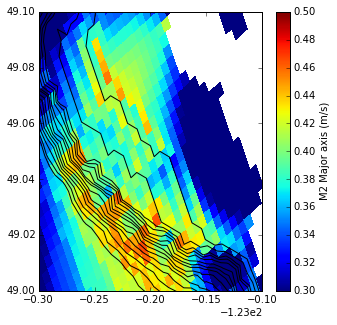

In [27]:
const='M2'
fig, ax = plt.subplots(1,1,figsize=((5,5)))
run= '/data/nsoontie/MEOPAR/SalishSea/results/tides/bathymods/bathy2/barotropic_tides_masked.mat'

bathy= '/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc'

isobaths= [5, 7,10,12,15, 20, 25, 30, 40, 50, 60, 70, 80, 90, 100]


data =sio.loadmat(run)
datastruc = data['datastruc']
lats = datastruc['lats'][0,0]
lons = datastruc['lons'][0,0]
    
grid = nc.Dataset(bathy)
major, minor, phase, incli= bc.get_constituent(const ,datastruc)
mesh=ax.pcolormesh(lons, lats, major, vmin=.3,vmax=0.5)
cbar = plt.colorbar(mesh, ax=ax)
cbar.set_label('M2 Major axis (m/s)')
    
#Add bathymetry contours
ax.plot(SITES['Central']['lon'], SITES['Central']['lat'], 'm*', label='Central')
ax.plot(SITES['East']['lon'], SITES['East']['lat'], 'm*',label = 'East')
    
for isobath in isobaths:
    viz_tools.plot_coastline(ax, grid,coords = 'map',isobath=isobath)
    
#Axis limits
ax.set_xlim([-123.3,-123.1])
ax.set_ylim([49,49.1])


(49, 49.1)

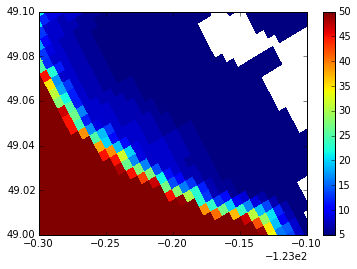

In [30]:
b=grid.variables['Bathymetry'][:]
nav_lon = grid.variables['nav_lon'][:]
nav_lat = grid.variables['nav_lat'][:]

plt.pcolormesh(nav_lon, nav_lat, b, vmin=5, vmax=50)
plt.colorbar()
ax=plt.gca()
ax.set_xlim([-123.3,-123.1])
ax.set_ylim([49,49.1])